In [1]:
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import utils
import gda

In [2]:
X, y = utils.get_iris()

X = (X-X.mean(axis=0)) / X.std(axis=0)
X = PCA(n_components=2).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xbounds = (X[:,0].min(), X[:,0].max())
ybounds = (X[:,1].min(), X[:,1].max())

colors = ['#ff0000', '#00ff00', '#0000ff']

In [3]:
qda_model = gda.QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

QuadraticDiscriminantAnalysis

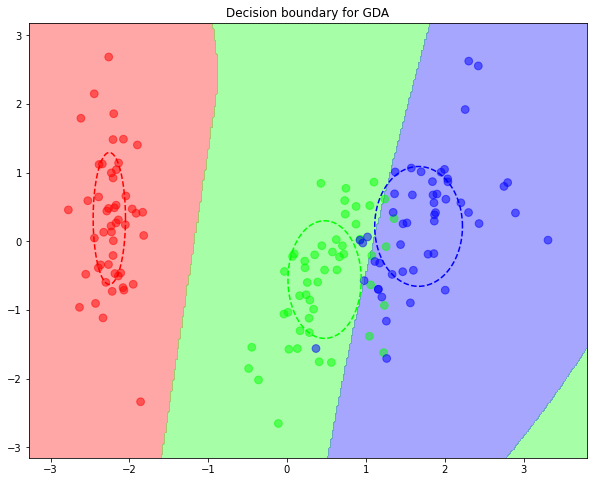

In [10]:
fig, ax = plt.subplots(figsize=(10,8))

utils.decision_boundary(ax=ax, xbounds=xbounds, ybounds=ybounds,
                    colors=colors, model=qda_model, N=300, margin=0.5)
ax.scatter(X[:, 0], X[:, 1], c=[colors[yi] for yi in  y], s=60, alpha=0.5)
for i in range(3):
    utils.plot_ellipsoid(ax=ax, mu=qda_model.means[i], sigma=qda_model.covs[i], color=colors[i])
ax.set_title("Decision boundary for GDA")
os.makedirs("images", exist_ok=True)
fig.savefig("images/decision-boundary-gda.png")
plt.show()

Remark that the net boundaries are quadratic

In [5]:
print(f"Accuracy for {qda_model}:", utils.accuracy(qda_model, X_test, y_test))
print(f"Log loss for {qda_model}:", utils.logloss(qda_model, X_test, y_test))

Accuracy for QuadraticDiscriminantAnalysis: 0.9
Log loss for QuadraticDiscriminantAnalysis: 0.20073740466512477


In [6]:
lda_model = gda.LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis

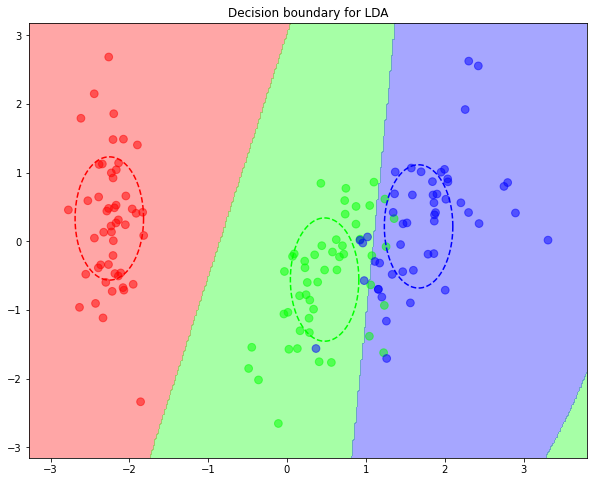

In [7]:
fig, ax = plt.subplots(figsize=(10,8))

utils.decision_boundary(ax=ax, xbounds=xbounds, ybounds=ybounds,
                    colors=colors, model=lda_model, N=300, margin=0.5)
ax.scatter(X[:, 0], X[:, 1], c=[colors[yi] for yi in  y], s=60, alpha=0.5)
for i in range(3):
    utils.plot_ellipsoid(ax=ax, mu=lda_model.means[i], sigma=lda_model.cov, color=colors[i])
ax.set_title("Decision boundary for LDA")
fig.savefig("images/decision-boundary-lda.png")
plt.show()

Remark that ellipses are identical and boundaries are linear.

In [8]:
print(f"Accuracy for {lda_model}:", utils.accuracy(lda_model, X_test, y_test))
print(f"Log loss for {lda_model}:", utils.logloss(lda_model, X_test, y_test))

Accuracy for LinearDiscriminantAnalysis: 0.9
Log loss for LinearDiscriminantAnalysis: 0.16288777812748426
